In [1]:
import os
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

====== data summary ======
General trash : 3966
Metal : 936
Plastic bag : 5178
Glass : 982
Plastic : 2943
Paper pack : 897
Styrofoam : 1263
Paper : 6352
Clothing : 468
Battery : 159


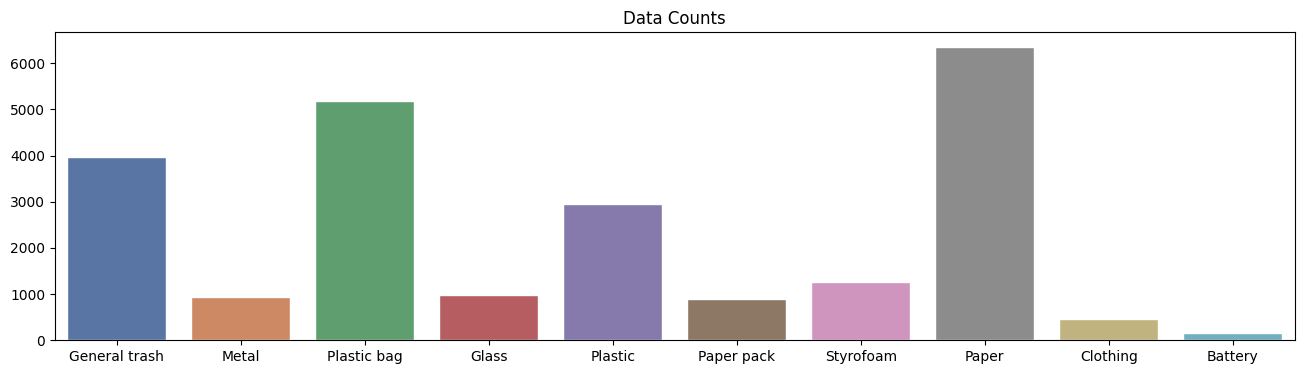

In [2]:
# open json and init
with open("/opt/ml/dataset/train.json", "r") as tr_json:

    train_data = json.load(tr_json)
    categories = []
    for category in train_data['categories']:
        categories.append(category['name'])
        
    annotations = train_data['annotations']

# count data
data_category = defaultdict(lambda: [0])

for anot in annotations:
    category_id = anot['category_id']
    category = categories[category_id]
    
    data_category[category][0] += 1

# print
print('====== data summary ======')
for key, item in data_category.items():
    print(f'{key} : {item[0]}')
print('==========================')
data_category = pd.DataFrame(data_category, index=['count'])

fig, axes = plt.subplots(1, 1, figsize = (16, 4))
axes.set_title('Data Counts')
sns.set_theme(style="whitegrid")
sns.barplot(data=data_category)
plt.show()